# 1-2. Feature Selction for Linear Regression
- 기수: 14
- 이름: 어희정
- 작성자: 13기 한연주

_본 과제는 9기 이승원님의 Regression 자료를 기반으로 만들었음을 밝힙니다._

서울시 자전거 이용건수에 영향을 미치는 주요 변수를 선별하고, 이를 기반으로 이용건수를 예측할 수 있는 Linear Regression 모델을 구축해봅시다.

총 4개의 문제가 있습니다. 코드를 잘 따라가면서 Q1, Q2, Q3, Q4를 차례대로 풀어보세요

## 01. Setting

### 데이터 불러오기

In [9]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_excel("bicycle_data.xlsx")
df.head()

,행정동,이용건수,행정동코드,자치구,대여소개수,이용거리(M),이용시간(분),LCD_거치_대수,QR_거치_대수,상권_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,청운효자동,11755,11110515,종로구,3,2.904426e+07,284027,5,59,5,...,2.885425e+06,3.143521e+06,3.745018e+06,3.170072e+06,2.157854e+06,2.640629e+06,323,276146690,14261,41
1,사직동,58976,11110530,종로구,12,1.243033e+08,1195279,99,139,6,...,5.133218e+06,6.282004e+06,5.561868e+06,4.041477e+06,2.650009e+06,2.740232e+06,89,371237211,34035,413
2,삼청동,15960,11110540,종로구,5,3.520926e+07,368791,23,38,1,...,1.157874e+06,1.197700e+06,1.266266e+06,9.427540e+05,7.849797e+05,7.954017e+05,9,401044841,6745,40
3,부암동,4353,11110550,종로구,5,1.896218e+07,126968,23,26,5,...,2.305686e+06,1.908983e+06,2.804853e+06,2.466070e+06,1.871393e+06,2.216136e+06,189,259634651,5001,18
4,평창동,3810,11110560,종로구,5,1.410898e+07,94067,15,23,3,...,1.935554e+06,2.306512e+06,3.250538e+06,3.803050e+06,3.117086e+06,3.559939e+06,294,480839259,878,26


### 데이터 전처리

분석에 필요하지 않은 열을 제거한다. 이는 독립변수를 임의적으로 제거하는 것이 아닌 애초에 불필요한 정보를 제거하는 것이다. 

In [15]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis = 1)

# Check dropped columns
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

현재 각 변수들의 범위는 상당히 다르다. 

In [39]:
df1.head()

,이용건수,상권_수,집객시설_수,관공서_수,은행_수,총병원_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,11755,5,24,3,1,0,0,0,1,0,...,2.885425e+06,3.143521e+06,3.745018e+06,3.170072e+06,2.157854e+06,2.640629e+06,323,276146690,14261,41
1,58976,6,200,12,22,0,0,0,20,0,...,5.133218e+06,6.282004e+06,5.561868e+06,4.041477e+06,2.650009e+06,2.740232e+06,89,371237211,34035,413
2,15960,1,16,3,1,0,0,0,0,0,...,1.157874e+06,1.197700e+06,1.266266e+06,9.427540e+05,7.849797e+05,7.954017e+05,9,401044841,6745,40
3,4353,5,46,3,2,0,0,0,2,0,...,2.305686e+06,1.908983e+06,2.804853e+06,2.466070e+06,1.871393e+06,2.216136e+06,189,259634651,5001,18
4,3810,3,86,4,1,0,0,0,2,1,...,1.935554e+06,2.306512e+06,3.250538e+06,3.803050e+06,3.117086e+06,3.559939e+06,294,480839259,878,26


회귀분석은 데이터의 단위(범위)에 민감하기 때문에 Scaling이 필요하다. 

Scaler는 다양한 종류가 있으나, 우선 Robust Scaler를 사용한다. Robust Scaler는 중앙값과 사분위수 범위를 사용해 이상치에 덜 민감하다는 특징이 있다. 이에 따라 추가적인 이상치 처리는 진행하지 않는다.

Robust Scaler 외 대표적인 Scaling 방법은 다음과 같다.
- 데이터의 평균과 표준편차를 사용해 정규화하는 StandardScaler
- 최댓값과 최솟값이 각각 1과 0이 되도록 스케일링하는 MinMaxScaler
- 절댓값의 범위가 0과 1 사이가 되도록 스케이링하는 MaxAbsScaler

이들 모두 이상치에 민감하다

In [41]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
                      '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
                      '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
                      '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
                      '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
                      '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
                      '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
                      '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
                      '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
                      '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
                      '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
                      '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
                      '길단위유동인구', '직장인구']

In [18]:
df2_scaled.head()

,이용건수,상권_수,집객시설_수,관공서_수,은행_수,총병원_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,-0.370264,0.333333,-0.422145,0.5,0.00,0.0,0.0,0.0,-0.555556,0.0,...,-0.186164,-0.188702,0.023044,-0.156918,-0.370213,-0.254954,0.444662,0.046755,-0.752024,0.000000
1,1.192504,0.666667,2.013841,5.0,5.25,0.0,0.0,0.0,1.555556,0.0,...,0.476562,0.844300,0.655541,0.240888,-0.086386,-0.200455,-0.472086,0.450052,-0.385100,5.975904
2,-0.231101,-1.000000,-0.532872,0.5,0.00,0.0,0.0,0.0,-0.666667,0.0,...,-0.695505,-0.829151,-0.839882,-1.173713,-1.161956,-1.264595,-0.785504,0.576471,-0.891490,-0.016064
3,-0.615232,0.333333,-0.117647,0.5,0.25,0.0,0.0,0.0,-0.444444,0.0,...,-0.357091,-0.595038,-0.304255,-0.478303,-0.535416,-0.487221,-0.080313,-0.023275,-0.923851,-0.369478
4,-0.633202,-0.333333,0.435986,1.0,0.00,0.0,0.0,0.0,-0.444444,1.0,...,-0.466219,-0.464196,-0.149099,0.132043,0.182979,0.248059,0.331048,0.914894,-1.000357,-0.240964


참고로 OLS를 실행할 때에는 컬럼명이 숫자로 시작할 경우 오류가 발생한다. 이번 과제에서는 해당되지 않지만 차후 회귀분석을 할 때 유의하길 바란다.

## 02. Intro to Feature Selection for Linear Regression

### Feature Selection

독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.

In [74]:
X = df2_scaled.drop('이용건수', axis = 1)
y = df2_scaled['이용건수']

Python에서는 자체적인 Feature Selection module을 제공하지 않으므로, 본 과제에서는 함께 제공한 feature_selection.py를 활용한다. 

In [76]:
import utils.feature_selection as fsel

Q1. 가장 먼저 linear regression 모델을 구축하기 위해 AIC를 변수 선택 기준으로 활용하고 ForwardSelection 방법을 적용하려고 한다. 다음 코드의 들어갈 적절한 변수명을 기입하라.

In [84]:
# feature_selection.py 를 참조하여 model_type과 elimination_criteria에 들어갈 적절한 변수명을 기입하시오.
fsel.forwardSelection(X, y, model_type = "linear", elimination_criteria = "aic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 남자40s생활인구 	AIC : 1280.964912822545
Entered : _30s_korean 	AIC : 1270.9460933043408
Entered : 아파트_단지_수 	AIC : 1244.1841297555256
Entered : 길단위유동인구 	AIC : 1239.2670646825086


/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

Entered : 초등학교_수 	AIC : 1234.87268860349
Entered : 직장인구 	AIC : 1230.9220038536073
Entered : 지하철_하차 	AIC : 1228.155526320979
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.75e-40
Time:                        16:46:21   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|    

/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

Q2. 선택된 변수들을 대상으로 다중공선성 문제를 확인하라. 

In [90]:
# 직접 선택된 변수들을 list 형태로 저장하시오. 
selected_cols = ['남자40s생활인구','_30s_korean','아파트_단지_수','길단위유동인구','초등학교_수','직장인구','지하철_하차']

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []

for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

남자40s생활인구      2.612474
_30s_korean    1.970809
아파트_단지_수       1.338337
길단위유동인구        1.042099
초등학교_수         1.042781
직장인구           1.444073
지하철_하차         1.753606
Intercept      1.327840
dtype: float64


['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

A2. 확인한 다중공선성 문제에 대해 서술하시오: 모든 변수의 VIF 값이 5 미만, 다중공선성 문제가 없음.

### 회귀 모델 적합

In [142]:
import statsmodels.formula.api as smf
# 회귀 모델 적합
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                data = df2_scaled)
result = model.fit()

In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.75e-40
Time:                        19:41:42   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 모델 평가

In [98]:
# sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2_scaled, test_size = 0.3, random_state = 1)
print('train:', len(train), '| test:', len(test))

train: 296 | test: 128


In [100]:
X_train = train.drop(['이용건수'], axis = 1)
y_train = train['이용건수']

X_test = test.drop(['이용건수'], axis = 1)
y_test = test['이용건수']

In [102]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

pred = result.predict(X_test)

In [104]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216031
mse: 1.595029464250069
mae: 0.689016731517567
mape: 2.2034124083054962


Q3. 선형 회귀 모형의 기본 가정은 다음과 같다. 이 가정들을 모두 만족해야만 해석을 신뢰할 수 있다. QQ-plot과 Residual Plot을 활용해 적합한 모델이 가정을 만족하는지 확인하라.
- 선형성: 독립변수와 종속변수 사이에 선형 관계가 존재한다
- 독립성: 오차항은 서로 독립적이어야 한다. 
- 정규성: 오차항은 정규분포를 따라야 한다.
- 등분산성: 오차항의 분산은 모든 관측값에서 일정해야 한다.
- 다중공선성 없음

In [149]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib as plt

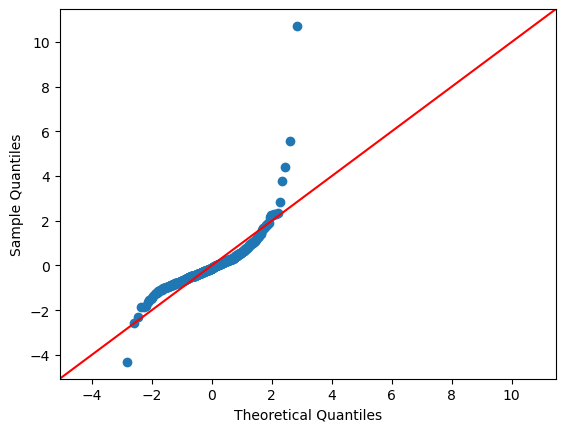

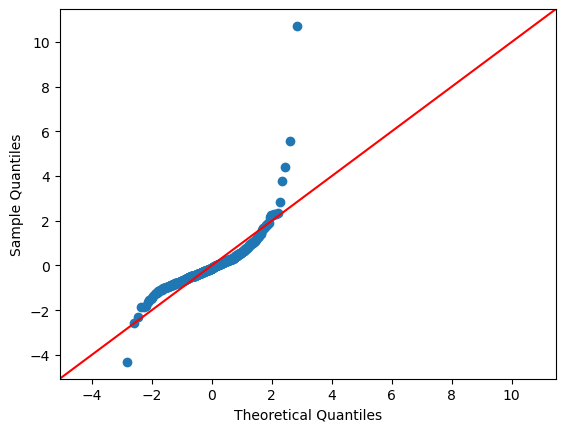

In [151]:
sm.qqplot(result.resid, fit = True, line = '45')

<Axes: xlabel='fitted', ylabel='resid'>

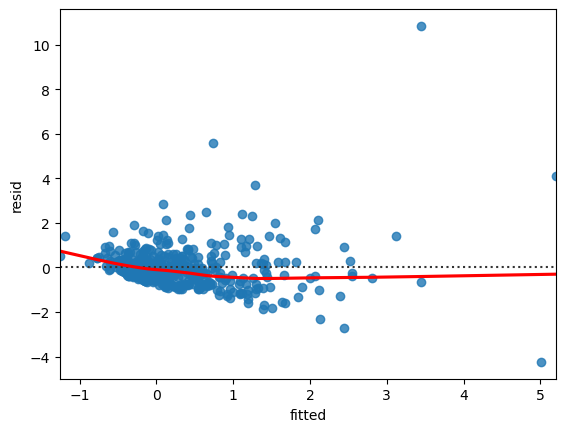

In [110]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x = 'fitted', y = 'resid', data = eqvar, line_kws = {'color':'red'}, lowess = True)

A3. 위에서 이미 확인한 다중공선성 문제의 답변과 종합하여 적합한 회귀분석의 기본 가정 만족 여부에 대해 서술하시오: 
선형성: 완벽하지 않음 — 직선만으로는 다 못 설명함.
독립성: 불명 
정규성: 아님 — 가운데는 선에 가깝지만, 오른쪽 꼬리 점들이 선 위로 크게 벗어남 → 오른쪽 꼬리 두꺼움 + 큰 양의 잔차 존재.
등분산성: 아님 — 오른쪽으로 갈수록 잔차 퍼짐이 커짐.
다중공선성: 문제 없음 — VIF 낮음

## 03. Comparison Experiment

Forward/Backward Selection 방법과 각종 Feature Selection 기준을 조합해 Linear Regression을 실습해봅시다.

feature_selection.py의 elimination_criteria 옵션은 총 4가지이다.
1) AIC (Akaike Information Criterion)
2) BIC (Bayesian Information Criterion)
3) R2 & Adjusted R2 (전체 오차에 대한 회귀 모형의 설명력)

Forward + AIC 조합은 02. Intro to Feature Selection for Linear Regression에서 이미 확인했다. 여기서는 나머지 7가지 조합에 대해 살펴보자.

### Case 1-2) Forward + BIC

In [118]:
fsel.forwardSelection(X, y, model_type = 'linear', elimination_criteria = 'bic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 남자40s생활인구 	BIC : 1289.064379733009
Entered : _30s_korean 	BIC : 1283.0952936700367
Entered : 아파트_단지_수 	BIC : 1260.3830635764534
Entered : 길단위유동인구 	BIC : 1259.5157319586683


/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

Entered : 초등학교_수 	BIC : 1259.1710893348816
break : Criteria
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     49.09
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           6.11e-40
Time:                        20:46:54   Log-Likelihood:                -611.44
No. Observations:                 424   AIC:                             1235.
Df Residuals:                     418   BIC:                             1259.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],


['intercept', '남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수']

In [120]:
selected_cols = ['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수']

vif_data = df2_scaled[selected_cols].copy()
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

print(vif_series)

selected_cols = []

for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

남자40s생활인구      1.450302
_30s_korean    1.789341
아파트_단지_수       1.328948
길단위유동인구        1.036088
초등학교_수         1.023490
Intercept      1.169870
dtype: float64


['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수']

In [122]:
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data = df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     49.09
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           6.11e-40
Time:                        20:47:11   Log-Likelihood:                -611.44
No. Observations:                 424   AIC:                             1235.
Df Residuals:                     418   BIC:                             1259.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1884      0.054      3.479      0.001       0.082       0.295
남자40s생활인구       0.4447      0.054      8.299      0.000       0.339       0.550
_30s_korean     0.5268      0.087      6.076      0.000       0.356       0.697
아파트_단지_수       -0.3757      0.073     -5.159      0.000      -0.519      -0.233
길단위유동인구        -0.1851      0.068     -2.724      0.007      -0.319      -0.052
초등학교_수          0.6877      0.273      2.520      0.012       0.151       1.224
==============================================================================
Omnibus:                      388.494   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21209.872
Skew:                           3.616   Prob(JB):                         0.00
Kurtosis:                      36.886   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
pred = result.predict(X_test)

print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4414173114847344
mse: 1.6638236501600023
mae: 0.6992123155312671
mape: 2.3375219880267406


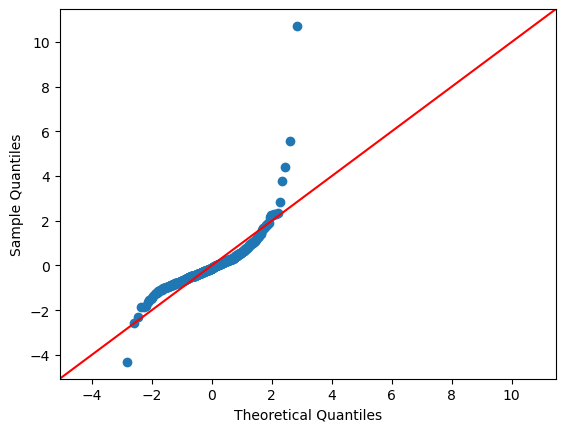

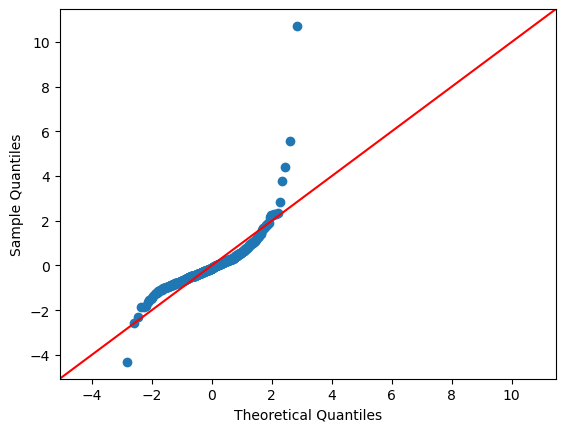

In [126]:
sm.qqplot(result.resid, fit = True, line = '45')

<Axes: xlabel='fitted', ylabel='resid'>

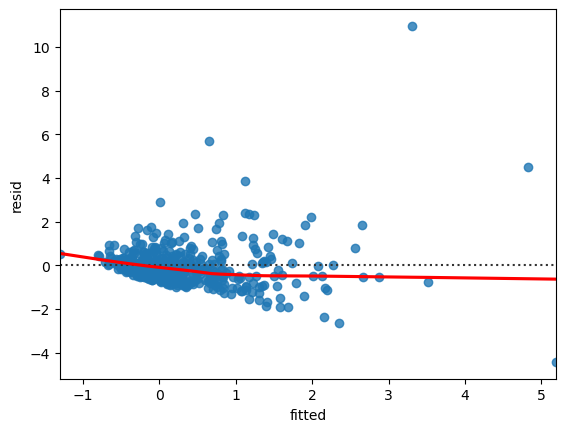

In [128]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x = 'fitted', y = 'resid', data = eqvar, line_kws = {'color':'red'}, lowess = True)

### Case 1-3) Forward + R2

In [153]:
fsel.forwardSelection(X, y, model_type = 'linear', elimination_criteria = 'r2')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 남자40s생활인구 	R2 : 0.2842285252700758
Entered : _30s_korean 	R2 : 0.30423311130629194
Entered : 아파트_단지_수 	R2 : 0.3498651164572828
Entered : 길단위유동인구 	R2 : 0.36038526291837925


/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

Entered : 초등학교_수 	R2 : 0.3699589688168007
Entered : 직장인구 	R2 : 0.37873960337371104
Entered : 지하철_하차 	R2 : 0.38568451218427235
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.75e-40
Time:                        22:23:49   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|  

/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

### Case 1-4) Forward + Adjusted R2

In [130]:
fsel.forwardSelection(X, y, model_type = 'linear', elimination_criteria = 'adjr2')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 남자40s생활인구 	AdjR2 : 0.28253238433469674
Entered : _30s_korean 	AdjR2 : 0.30092780542176123
Entered : 아파트_단지_수 	AdjR2 : 0.34522129586054917
Entered : 길단위유동인구 	AdjR2 : 0.35427915564313706


/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

Entered : 초등학교_수 	AdjR2 : 0.3624225928457099
Entered : 직장인구 	AdjR2 : 0.36980060486110267
Entered : 지하철_하차 	AdjR2 : 0.3753474727258346
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.75e-40
Time:                        20:53:37   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t     

/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]],
/Users/hjuh/DSL/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no lon

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

### Case 2-1) Backward + AIC

In [132]:
fsel.backwardSelection(X, y, model_type = 'linear', elimination_criteria = 'aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : 일반_병원_수
Eliminated : 총병원_수
Eliminated : 아파트_평균_시가
Eliminated : _90s_foreigner
Eliminated : 숙박_시설_수
Eliminated : _80s_korean
Eliminated : 상권_수
Eliminated : 슈퍼마켓_수
Eliminated : 중학교_수
Eliminated : 초중고등학교_수
Eliminated : 극장_수
Eliminated : _80s_foreigner
Eliminated : _10s_foreigner
Eliminated : 관공서_수
Eliminated : _40s_korean
Eliminated : 종합병원_수
Eliminated : 대중교통_하차
Eliminated : 지하철_승차
Eliminated : 여자50s생활인구
Eliminated : 버스_하차
Eliminated : 남자60s생활인구
Eliminated : 남자50s생활인구
Eliminated : intercept
Eliminated : 약국_수
Eliminated : 여자70s이상생활인구
Eliminated : 남자40s생활인구
Eliminated : 여자10s생활인구
Eliminated : 집객시설_수
Eliminated : 여자0s생활인구
Eliminated : 남자70s이상생활인구
Eliminated : 여자30s생활인구
Eliminated : 대학교_수
Eliminated : 고등학교_수
Eliminated : _100s_foreigner
Eliminated : _90s_korean
Eliminated : _0s_foreigner
Eliminated : _100s_korean
Regained :  _100s_korean
                                 OLS Regression Results                      

['은행_수',
 '유치원_수',
 '초등학교_수',
 '백화점_수',
 '_20s_foreigner',
 '_30s_foreigner',
 '_40s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_70s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_20s_korean',
 '_30s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '_100s_korean',
 '총생활인구수',
 '대중교통_승차',
 '버스_승차',
 '지하철_하차',
 '남자0s생활인구',
 '남자10s생활인구',
 '남자20s생활인구',
 '남자30s생활인구',
 '여자20s생활인구',
 '여자40s생활인구',
 '여자60s생활인구',
 '아파트_단지_수',
 '길단위유동인구',
 '직장인구']

### Case 2-2) Backward + BIC

In [134]:
fsel.backwardSelection(X, y, model_type = 'linear', elimination_criteria = 'bic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : 일반_병원_수
Eliminated : 총병원_수
Eliminated : 아파트_평균_시가
Eliminated : _90s_foreigner
Eliminated : 숙박_시설_수
Eliminated : _80s_korean
Eliminated : 상권_수
Eliminated : 슈퍼마켓_수
Eliminated : 중학교_수
Eliminated : 초중고등학교_수
Eliminated : 극장_수
Eliminated : _80s_foreigner
Eliminated : _10s_foreigner
Eliminated : 관공서_수
Eliminated : _40s_korean
Eliminated : 종합병원_수
Eliminated : 대중교통_하차
Eliminated : 지하철_승차
Eliminated : 여자50s생활인구
Eliminated : 버스_하차
Eliminated : 남자60s생활인구
Eliminated : 남자50s생활인구
Eliminated : intercept
Eliminated : 약국_수
Eliminated : 여자70s이상생활인구
Eliminated : 남자40s생활인구
Eliminated : 여자10s생활인구
Eliminated : 집객시설_수
Eliminated : 여자0s생활인구
Eliminated : 남자70s이상생활인구
Eliminated : 여자30s생활인구
Eliminated : 대학교_수
Eliminated : 고등학교_수
Eliminated : _100s_foreigner
Eliminated : _90s_korean
Eliminated : _0s_foreigner
Eliminated : _100s_korean
Eliminated : 여자40s생활인구
Eliminated : 백화점_수
Eliminated : 은행_수
Eliminated : 유치원_수
Eliminated : _70s_forei

['초등학교_수',
 '_20s_foreigner',
 '_30s_foreigner',
 '_40s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_30s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '총생활인구수',
 '대중교통_승차',
 '버스_승차',
 '지하철_하차',
 '남자10s생활인구',
 '여자20s생활인구',
 '여자60s생활인구',
 '아파트_단지_수',
 '길단위유동인구',
 '직장인구']

### Case 2-3) Backward + R2

In [136]:
fsel.backwardSelection(X, y, model_type = 'linear', elimination_criteria = 'r2')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : 일반_병원_수
Eliminated : 총병원_수
Regained :  총병원_수
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     6.456
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.93e-31
Time:                        20:53:54   Log-Likelihood:                -549.09
No. Observations:                 424   AIC:                             1226.
Df Residuals:                     360   BIC:                             1485.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-

['intercept',
 '상권_수',
 '집객시설_수',
 '관공서_수',
 '은행_수',
 '총병원_수',
 '종합병원_수',
 '약국_수',
 '유치원_수',
 '초중고등학교_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '_0s_foreigner',
 '_10s_foreigner',
 '_20s_foreigner',
 '_30s_foreigner',
 '_40s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_70s_foreigner',
 '_80s_foreigner',
 '_90s_foreigner',
 '_100s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_20s_korean',
 '_30s_korean',
 '_40s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '_80s_korean',
 '_90s_korean',
 '_100s_korean',
 '총생활인구수',
 '대중교통_승차',
 '지하철_승차',
 '버스_승차',
 '대중교통_하차',
 '지하철_하차',
 '버스_하차',
 '남자0s생활인구',
 '남자10s생활인구',
 '남자20s생활인구',
 '남자30s생활인구',
 '남자40s생활인구',
 '남자50s생활인구',
 '남자60s생활인구',
 '남자70s이상생활인구',
 '여자0s생활인구',
 '여자10s생활인구',
 '여자20s생활인구',
 '여자30s생활인구',
 '여자40s생활인구',
 '여자50s생활인구',
 '여자60s생활인구',
 '여자70s이상생활인구',
 '아파트_단지_수',
 '아파트_평균_시가',
 '길단위유동인구',
 '직장인구']

### Case 2-4) Forward + Adjusted R2

In [138]:
fsel.backwardSelection(X, y, model_type = 'linear', elimination_criteria = 'adjr2')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : 일반_병원_수
Eliminated : 총병원_수
Eliminated : 아파트_평균_시가
Eliminated : _90s_foreigner
Eliminated : 숙박_시설_수
Eliminated : _80s_korean
Eliminated : 상권_수
Eliminated : 슈퍼마켓_수
Eliminated : 중학교_수
Eliminated : 초중고등학교_수
Eliminated : 극장_수
Eliminated : _80s_foreigner
Eliminated : _10s_foreigner
Eliminated : 관공서_수
Eliminated : _40s_korean
Eliminated : 종합병원_수
Eliminated : 대중교통_하차
Eliminated : 지하철_승차
Eliminated : 여자50s생활인구
Eliminated : 버스_하차
Eliminated : 남자60s생활인구
Eliminated : 남자50s생활인구
Eliminated : intercept
Eliminated : 약국_수
Eliminated : 여자70s이상생활인구
Eliminated : 남자40s생활인구
Eliminated : 여자10s생활인구
Eliminated : 집객시설_수
Regained :  집객시설_수
                                 OLS Regression Results                                
Dep. Variable:                   이용건수   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squar

['집객시설_수',
 '은행_수',
 '유치원_수',
 '초등학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '_0s_foreigner',
 '_20s_foreigner',
 '_30s_foreigner',
 '_40s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_70s_foreigner',
 '_100s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_20s_korean',
 '_30s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '_90s_korean',
 '_100s_korean',
 '총생활인구수',
 '대중교통_승차',
 '버스_승차',
 '지하철_하차',
 '남자0s생활인구',
 '남자10s생활인구',
 '남자20s생활인구',
 '남자30s생활인구',
 '남자70s이상생활인구',
 '여자0s생활인구',
 '여자20s생활인구',
 '여자30s생활인구',
 '여자40s생활인구',
 '여자60s생활인구',
 '아파트_단지_수',
 '길단위유동인구',
 '직장인구']

### Q4. Summary


실험한 8가지 조합의 결과를 기반으로, 각 조합에서 선택한 변수, 예측 성능 지표, 그리고 잔차 진단 결과 등을 종합적으로 비교하라.

답변 작성 시 다음의 질문들(예시)을 생각할 수 있다.
- Forward와 Backward 방식 중 전반적으로 더 안정적인 예측 성능을 보인 방식은 무엇이며, 그 이유는 무엇이라고 생각하는가?
- 변수 선택 기준에 따라 선택된 변수 조합이 어떻게 달라졌는가?
- 과적합 또는 과소적합이 의심되는 조합이 있는가? 있다면 왜 그렇게 판단했는가?
- 가장 신뢰할 수 있는 모델은 무엇이며, 그 모델을 선택한 근거는 무엇인가?

A4: 
BIC 기준 ->Forward + BIC 가 BIC=1259로 최저(변수 5개) → 가장 보수적이고 간결함.
